In [1]:
from nilearn import datasets
from nilearn import input_data
import numpy as np
import matplotlib.pylab as plt
from nilearn.plotting import plot_prob_atlas
from nilearn.plotting import plot_stat_map, show
from nilearn import plotting

/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
subList =  ['008', '1253' , '1293' ,'1307','1322','1339','1343','1387'] #'1223'
midSubList = ['1253','1263','1351','1364','1369','1390','1403']

subject_list = np.concatenate([subList,midSubList])
rest_files_1 = ['/home/oad4/scratch60/kpeOutput/fmriprep/sub-%s/ses-1/func/sub-%s_ses-1_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz' % (sub,sub) for sub in subList]

confound_files_1 = ['/home/oad4/scratch60/kpeOutput/fmriprep/sub-%s/ses-1/func/sub-%s_ses-1_task-rest_desc-confounds_regressors.tsv' % (sub,sub) for sub in subList]


rest_files_2 = ['/home/oad4/scratch60/kpeOutput/fmriprep/sub-%s/ses-2/func/sub-%s_ses-2_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz' % (sub,sub) for sub in subList]

confound_files_2 = ['/home/oad4/scratch60/kpeOutput/fmriprep/sub-%s/ses-2/func/sub-%s_ses-2_task-rest_desc-confounds_regressors.tsv' % (sub,sub) for sub in subList]
kpe_label = [1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0]

rest_files = np.concatenate([rest_files_1, rest_files_2])
confound_files = np.concatenate([confound_files_1, confound_files_2])

In [3]:
def removeVars (confoundFile):
    import pandas as pd
    confound = pd.read_csv(confoundFile,sep="\t", na_values="n/a")
    finalConf = confound[['csf', 'white_matter', 'global_signal',
                          'a_comp_cor_00', 'a_comp_cor_01',	'a_comp_cor_02', 'a_comp_cor_03', 'a_comp_cor_04', 
                        'a_comp_cor_05', 'trans_x', 'trans_y', 'trans_z', 'rot_x', 'rot_y', 'rot_z']]
 
    return finalConf


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:84: DeprecationWarning: The 'cachedir' parameter has been deprecated in version 0.12 and will be removed in version 0.14.
You provided "cachedir='/home/oad4/scratch60/nilearn'", use "location='/home/oad4/scratch60/nilearn'" instead.
  memory = Memory(cachedir=cache_dir, verbose=verbose)
/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[MultiNiftiMasker.fit] Loading data from [/home/oad4/scratch60/kpeOutput/fmriprep/sub-008/ses-1/func/sub-008_ses-1_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz, /home/oad4/scratch60/kpeOutput/fmriprep/sub-1253/ses-1/func/sub-
[MultiNiftiMasker.fit] Computing mask
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
[DictLearning] Learning initial components


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:84: DeprecationWarning: The 'cachedir' parameter has been deprecated in version 0.12 and will be removed in version 0.14.
You provided "cachedir='/home/oad4/scratch60/nilearn'", use "location='/home/oad4/scratch60/nilearn'" instead.
  memory = Memory(cachedir=cache_dir, verbose=verbose)
/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]0.3s, 0.0min    : Loading randomized_svd...
______________________________________randomized_svd cache loaded - 0.2s, 0.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[Memory]0.7s, 0.0min    : Loading fastica...
_____________________________________________fastica cache loaded - 0.4s, 0.0min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished


[DictLearning] Computing initial loadings


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:84: DeprecationWarning: The 'cachedir' parameter has been deprecated in version 0.12 and will be removed in version 0.14.
You provided "cachedir='/home/oad4/scratch60/nilearn'", use "location='/home/oad4/scratch60/nilearn'" instead.
  memory = Memory(cachedir=cache_dir, verbose=verbose)
/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]0.3s, 0.0min    : Loading _compute_loadings...
____________________________________compute_loadings cache loaded - 0.0s, 0.0min
[DictLearning] Learning dictionary
[Memory]0.7s, 0.0min    : Loading dict_learning_online...
________________________________dict_learning_online cache loaded - 0.6s, 0.0min


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]213.7s, 3.6min  : Loading explained_variance...
__________________________________explained_variance cache loaded - 0.0s, 0.0min


Text(0.5, 1.0, 'Explained variance for 20 components')

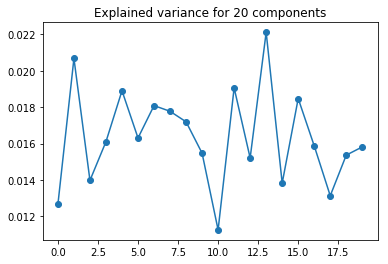

In [4]:
# run dictlearning and take specific network that explains most variance
# the same but with dictionary learning. 
from nilearn.decomposition import DictLearning
dictlearn = DictLearning(n_components=20, smoothing_fwhm=6.,
                memory="/home/oad4/scratch60/nilearn", memory_level=2,
                verbose=8, random_state=0)

# fir resting state 1
dictlearn.fit(rest_files_1)
component_img1 = dictlearn.components_img_

# analyze explained variance of each component
masker = dictlearn.masker_
data = np.concatenate(masker.transform(rest_files_1))
scores = dictlearn._raw_score(data, per_component=True)
plt.plot(scores, '-o')
plt.title('Explained variance for 20 components')

Here we need to choose the best seed. We can look on the graph and choose the one who has the highest explained variance. 

/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/scipy/ndimage/measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)


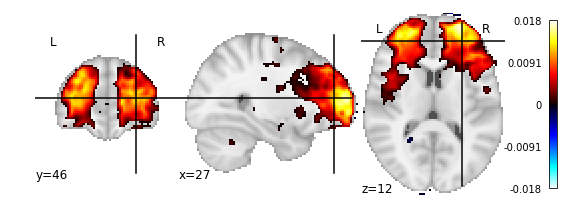

In [5]:
from nilearn.image import concat_imgs, index_img
single_mn_image_1 = index_img(component_img1, 12) # extracting the specific component. 
plot_stat_map(single_mn_image_1)


In [6]:
# Import Region Extractor algorithm from regions module
# threshold=0.5 indicates that we keep nominal of amount nonzero voxels across all
# maps, less the threshold means that more intense non-voxels will be survived.
from nilearn.regions import RegionExtractor

extractor = RegionExtractor(component_img1, threshold=0.5,
                            thresholding_strategy='ratio_n_voxels',
                            extractor='local_regions',
                            standardize=True, min_region_size=1350, 
                           high_pass=.01 , low_pass = .1, t_r=1)
# Just call fit() to process for regions extraction
extractor.fit()
# Extracted regions are stored in regions_img_
regions_extracted_img = extractor.regions_img_
# Each region index is stored in index_
regions_index = extractor.index_
# Total number of regions extracted
n_regions_extracted = regions_extracted_img.shape[-1]

/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/numpy/matrixlib/defmatrix.py:71: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)
/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/scipy/sparse/linalg/isolve/iterative.py:2: DeprecationWarning: scipy.sparse.linalg.cg called without specifying `atol`. The default value will be changed in a future release. For compatibility, specify a value for `atol` explicitly, e.g., ``cg(..., atol=0)``, or to retain the old behavior ``cg(..., atol='legacy')``
  


In [7]:
print('the number of regions extracted is %s' %n_regions_extracted)
regions_index.index(12) # indexing the 13th component regions extracted. 


the number of regions extracted is 146


83

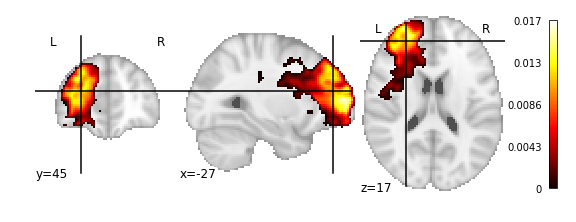

In [89]:
from nilearn.image import concat_imgs, index_img
single_mn_image = index_img(extractor.regions_img_, 83) # extracting the specific component. 
plot_stat_map(single_mn_image)



In [90]:
#taking coordinates of the first region extracted based on that component
seed_coord_float = list(plotting.find_xyz_cut_coords(single_mn_image)) # this function takes coordinated from image
# round the coordinates
seed_coord = [round(x) for x in seed_coord_float]
print ('The seed 1st component coordinated are %s' %seed_coord)

seed_coord = [(27,55,9)]

#(-29,52,11),
#pcc_coords = [(0, -52, 18)]

The seed 1st component coordinated are [-29, 52, 11]


In [91]:
seed_masker = input_data.NiftiSpheresMasker(
    seed_coord, radius=8,
    detrend=True, standardize=True,
    low_pass=0.1, high_pass=0.01, t_r=1.,
    memory="/home/oad4/scratch60/nilearn", memory_level=1, verbose=0)

In [92]:
func_filename = rest_files_2[0]
confound_filename = removeVars(confound_files_2[0])

In [93]:
seed_time_series = seed_masker.fit_transform(func_filename,
                                             confounds=[confound_filename.values])

/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:84: DeprecationWarning: The 'cachedir' parameter has been deprecated in version 0.12 and will be removed in version 0.14.
You provided "cachedir='/home/oad4/scratch60/nilearn'", use "location='/home/oad4/scratch60/nilearn'" instead.
  memory = Memory(cachedir=cache_dir, verbose=verbose)


In [94]:
brain_masker = input_data.NiftiMasker(
    smoothing_fwhm=6,
    detrend=True, standardize=True,
    low_pass=0.1, high_pass=0.01, t_r=1.,
    memory="/home/oad4/scratch60/nilearn", memory_level=1, verbose=0)

In [95]:
brain_time_series = brain_masker.fit_transform(func_filename,
                                               confounds=[confound_filename.values])

In [96]:
print("Seed time series shape: (%s, %s)" % seed_time_series.shape)
print("Brain time series shape: (%s, %s)" % brain_time_series.shape)

Seed time series shape: (580, 1)
Brain time series shape: (580, 1082035)


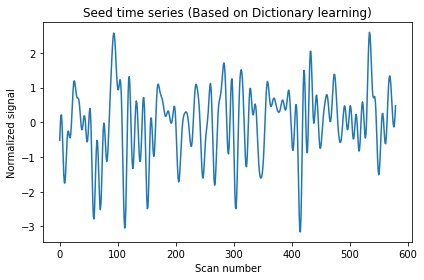

In [97]:
plt.plot(seed_time_series)
plt.title('Seed time series (Based on Dictionary learning)')
plt.xlabel('Scan number')
plt.ylabel('Normalized signal')
plt.tight_layout()

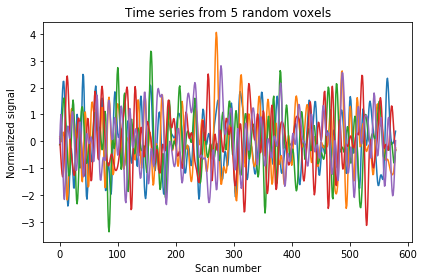

In [85]:
plt.plot(brain_time_series[:, [10, 45, 100, 5000, 10000]])
plt.title('Time series from 5 random voxels')
plt.xlabel('Scan number')
plt.ylabel('Normalized signal')
plt.tight_layout()

In [98]:
seed_to_voxel_correlations = (np.dot(brain_time_series.T, seed_time_series) /
                              seed_time_series.shape[0]
                              )

In [99]:
print("Seed-to-voxel correlation shape: (%s, %s)" %
      seed_to_voxel_correlations.shape)
print("Seed-to-voxel correlation: min = %.3f; max = %.3f" % (
    seed_to_voxel_correlations.min(), seed_to_voxel_correlations.max()))

Seed-to-voxel correlation shape: (1082035, 1)
Seed-to-voxel correlation: min = -0.541; max = 0.848


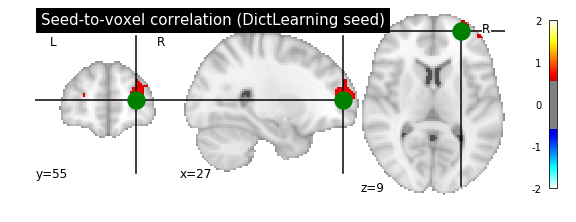

In [100]:
from nilearn import plotting

seed_to_voxel_correlations_img = brain_masker.inverse_transform(
    seed_to_voxel_correlations.T)
display = plotting.plot_stat_map(seed_to_voxel_correlations_img,
                                 threshold=0.6, vmax=2,
                                 cut_coords=seed_coord[0],
                                 title="Seed-to-voxel correlation (DictLearning seed)"
                                 )
display.add_markers(marker_coords=seed_coord, marker_color='g', marker_size=300)

In [101]:
seed_to_voxel_correlations_fisher_z = np.arctanh(seed_to_voxel_correlations)
print("Seed-to-voxel correlation Fisher-z transformed: min = %.3f; max = %.3f"
      % (seed_to_voxel_correlations_fisher_z.min(),
         seed_to_voxel_correlations_fisher_z.max()
         )
      )

Seed-to-voxel correlation Fisher-z transformed: min = -0.606; max = 1.249
